# Manipulating Dataframe

In [31]:
import pandas as pd

## Creating dataframe

In [32]:
# Create a DataFrame manually from a dictionary of Pandas Series

# create a dictionary of Pandas Series 
items = {'Bob' : pd.Series(data = [245, 25, 55], index = ['bike', 'pants', 'watch']),
         'Alice' : pd.Series(data = [40, 110, 500, 45], index = ['book', 'glasses', 'bike', 'pants'])}

# print the type of items to see that it is a dictionary
print(type(items)) # class 'dict'

# create a Pandas DataFrame by passing it a dictionary of Series
shopping_carts = pd.DataFrame(items)

# create a DataFrame that only has a subset of the data/columns
bob_shopping_cart = pd.DataFrame(items, columns=['Bob'])

# create a DataFrame that only has selected keys
sel_shopping_cart = pd.DataFrame(items, index = ['pants', 'book'])

# combine both of the above - selected keys for selected columns
alice_sel_shopping_cart = pd.DataFrame(items, index = ['glasses', 'bike'], columns = ['Alice'])

# create DataFrames from a dictionary of lists (arrays)
# In this case, however, all the lists (arrays) in the dictionary must be of the same length

# create a dictionary of lists (arrays)
data = {'Integers' : [1,2,3],
        'Floats' : [4.5, 8.2, 9.6]}

# create a DataFrame 
df = pd.DataFrame(data)

# create a DataFrame and provide the row index
df = pd.DataFrame(data, index = ['label 1', 'label 2', 'label 3'])

# create DataFrames from a list of Python dictionaries
# create a list of Python dictionaries
items2 = [{'bikes': 20, 'pants': 30, 'watches': 35}, 
          {'watches': 10, 'glasses': 50, 'bikes': 15, 'pants':5}]

# create a DataFrame 
store_items = pd.DataFrame(items2)

# create a DataFrame and provide the row index
store_items = pd.DataFrame(items2, index = ['store 1', 'store 2'])

print('shopping_carts has shape:', shopping_carts.shape)
print('shopping_carts has dimension:', shopping_carts.ndim)
print('shopping_carts has a total of:', shopping_carts.size, 'elements')
print()
print('The data in shopping_carts is:\n', shopping_carts.values)
print()
print('The row index in shopping_carts is:', shopping_carts.index)
print()
print('The column index in shopping_carts is:', shopping_carts.columns)

<class 'dict'>
shopping_carts has shape: (5, 2)
shopping_carts has dimension: 2
shopping_carts has a total of: 10 elements

The data in shopping_carts is:
 [[245. 500.]
 [ nan  40.]
 [ nan 110.]
 [ 25.  45.]
 [ 55.  nan]]

The row index in shopping_carts is: Index(['bike', 'book', 'glasses', 'pants', 'watch'], dtype='object')

The column index in shopping_carts is: Index(['Bob', 'Alice'], dtype='object')


## Loading Data into DF

In [33]:
# Loading Data into DF
filename = '../data/data.csv'

df = pd.read_csv(filename)

# limit which rows are read when reading in a file
pd.read_csv(filename, nrows=10)        
# only read first 10 rows

pd.read_csv(filename, skiprows=[1, 2]) 
# skip the first two rows of data

# randomly sample a DataFrame
train = df.sample(frac=0.75) 
# will contain 75% of the rows

test = df[~df.index.isin(train.index)] 
# will contain the other 25%

# change the maximum number of rows and columns printed (‘None’ means unlimited)
pd.set_option('max_rows', None) 
# default is 60 rows

pd.set_option('max_columns', None) 
# default is 20 columns
#print (df)

# reset options to defaults
pd.reset_option('max_rows')
pd.reset_option('max_columns')

# change the options temporarily (settings are restored when you exit the ‘with’ block)
#with pd.option_context('max_rows', None, 'max_columns', None):
#    print (df)

## Dealing with NaN values (missing data)

In [34]:
# Dealing with NaN values (missing data)

# create a list of Python dictionaries
items2 = [{'bikes': 20, 'pants': 30, 'watches': 35, 'shirts': 15, 'shoes':8, 'suits':45},
{'watches': 10, 'glasses': 50, 'bikes': 15, 'pants':5, 'shirts': 2, 'shoes':5, 'suits':7},
{'bikes': 20, 'pants': 30, 'watches': 35, 'glasses': 4, 'shoes':10}]

# We create a DataFrame and provide the row index
store_items = pd.DataFrame(items2, index = ['store 1', 'store 2', 'store 3'])

# check if we have any NaN values in our dataset
# .any() performs an or operation. If any of the values along the
# specified axis is True, this will return True.
df.isnull().any()
'''
Date   False
Open   True
High   False
Low    False
Close  False
Volume False
dtype: bool
'''

# count the number of NaN values in DataFrame
x =  store_items.isnull().sum().sum()
# count the number of non-NaN values in DataFrame
x = store_items.count()

# remove rows or columns from our DataFrame that contain any NaN values

# drop any rows with NaN values
store_items.dropna(axis = 0)

# drop any columns with NaN values
store_items.dropna(axis = 1)

# the original DataFrame is not modified by default
# to remove missing values from original df, use inplace = True
store_items.dropna(axis = 0, inplace = True)

# replace all NaN values with 0
store_items.fillna(0)

# forward filling: replace NaN values with previous values in the df,
# this is known as . When replacing NaN values with forward filling,
# we can use previous values taken from columns or rows.
# replace NaN values with the previous value in the column
store_items.fillna(method = 'ffill', axis = 0)

# backward filling: replace the NaN values with the values that
# go after them in the DataFrame
# replace NaN values with the next value in the row
store_items.fillna(method = 'backfill', axis = 1)

# replace NaN values by using linear interpolation using column values
store_items.interpolate(method = 'linear', axis = 0)

# the original DataFrame is not modified. replace the NaN values
# in place by setting inplace = True inside function
store_items.fillna(method = 'ffill', axis = 0, inplace = True)
store_items.interpolate(method = 'linear', axis = 0, inplace = True)

## head, tail, describe, max, memory_usage

In [35]:
data = pd.read_csv(filename)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
data.head()
data.tail()
data.describe()
# prints max value in each column
data.max()

# display the memory usage of a DataFrame
# total usage
data.info()
# usage by column
data.memory_usage()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Index                       128
id                         4552
diagnosis                  4552
radius_mean                4552
texture_mean               4552
perimeter_mean             4552
area_mean                  4552
smoothness_mean            4552
compactness_mean           4552
concavity_mean             4552
concave points_mean        4552
symmetry_mean              4552
fractal_dimension_mean     4552
radius_se                  4552
texture_se                 4552
perimeter_se               4552
area_se                    4552
smoothness_se              4552
compactness_se             4552
concavity_se               4552
concave points_se          4552
symmetry_se                4552
fractal_dimension_se       4552
radius_worst               4552
texture_worst              4552
perimeter_worst            4552
area_worst                 4552
smoothness_worst           4552
compactness_worst          4552
concavity_worst            4552
concave points_worst       4552
symmetry

## corr

In [37]:
# get the correlation between different columns
data.corr().head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


## Groupby

In [38]:
# Groupby
data.groupby(['diagnosis'])
data.groupby(['diagnosis'])['id']

# display the average radius_mean per diagnosis type
print(data.groupby(['diagnosis'])['radius_mean'].mean())

# display the total radius mean by diagnosis type
print(data.groupby(['diagnosis'])['radius_mean'].sum())

diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64
diagnosis
B    4336.309
M    3702.120
Name: radius_mean, dtype: float64


### Replace Values

In [39]:
# Replace Values
import numpy as np

s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
print(s)
s.map({'cat': 'kitten', 'dog': 'puppy'})

0       cat
1       dog
2       NaN
3    rabbit
dtype: object


0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

## Selecting data using Labels (Column Headings)

In [40]:
print("Index is :", data[(data.radius_mean == 20.29)].index.values)

datadict = data.to_dict()

data_1 = datadict["texture_mean"]

Index is : [4]


In [41]:
data_2 = data[["texture_mean", "concavity_mean", "diagnosis"]]
data_2.head()

,texture_mean,concavity_mean,diagnosis
0,10.38,0.3001,M
1,17.77,0.0869,M
2,21.25,0.1974,M
3,20.38,0.2414,M
4,14.34,0.1980,M


## Slicing dataframe

In [42]:
data_3 = data[0:3]
data_3

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [43]:
data_4 = data[-1:]
data_4

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039


## Copying Objects vs Referencing Objects in Python

In [44]:
# Using the 'copy() method'
true_copy_data = data.copy()

# Using the '=' operator
ref_data = data

In [45]:
true_copy_data[0:3] = 0

true_copy_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,0,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
1,0,0,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
2,0,0,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
# Assign the value `0` to the first three rows of data in the DataFrame
ref_data[0:3] = 0

ref_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,0,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
1,0,0,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
2,0,0,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,0,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
1,0,0,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
2,0,0,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Slicing Subsets of Rows and Columns in Python
- We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.

    - loc is primarily label based indexing. Integers may be used but they are interpreted as a label.
    - iloc is primarily integer based indexing

In [49]:
# iloc[row slicing, column slicing]
#data.iloc[row, col]
data.iloc[0:3, 1:4]

,diagnosis,radius_mean,texture_mean
0,0,0.0,0.0
1,0,0.0,0.0
2,0,0.0,0.0


In [50]:
# Select all columns for rows of index values 0 and 10
data.loc[[0, 10], ["id","diagnosis"]]

,id,diagnosis
0,0,0
10,845636,M


In [51]:
# Select all columns for rows of index values 0 and 10
data.loc[[0, 10], "id"]

0          0
10    845636
Name: id, dtype: int64

In [52]:
# Select all columns for rows of index values 0 and 10
data.loc[[0,6], ["id", "compactness_mean", "area_mean"]]

,id,compactness_mean,area_mean
0,0,0.000,0.0
6,844359,0.109,1040.0


In [53]:
data[data.diagnosis == "B"]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [54]:
data[data.area_mean < 200]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,0,0.000,0.00,0.00,0.0,0.00000,0.00000,0.00000,0.00000,...,0.000,0.00,0.00,0.0,0.00000,0.00000,0.0000,0.00,0.0000,0.00000
1,0,0,0.000,0.00,0.00,0.0,0.00000,0.00000,0.00000,0.00000,...,0.000,0.00,0.00,0.0,0.00000,0.00000,0.0000,0.00,0.0000,0.00000
2,0,0,0.000,0.00,0.00,0.0,0.00000,0.00000,0.00000,0.00000,...,0.000,0.00,0.00,0.0,0.00000,0.00000,0.0000,0.00,0.0000,0.00000
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00,0.2932,0.09382
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00,0.3058,0.09938
539,921362,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,...,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05,0.2790,0.10660
568,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00,0.2871,0.07039


In [55]:
data[(data.diagnosis == "M") & (data.area_mean > 1500)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,8712289,M,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,...,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,M,23.29,26.67,158.9,1685.0,0.11410,0.20840,0.3523,0.16200,...,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
339,89812,M,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


In [56]:
import numpy as np

data.loc[0, ["diagnosis"]] = np.NaN
data.loc[1, ["diagnosis"]] = np.NaN

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,NaN,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
1,0,NaN,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
2,0,0,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,...,0.00,0.00,0.00,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
# To select just the rows with NaN values, we can use the 'any()' method
data[pd.isnull(data).any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# What does this do?
empty_diagnosis = data[pd.isnull(data).any(axis=1)]['diagnosis']
empty_diagnosis

0    NaN
1    NaN
Name: diagnosis, dtype: object

/home/rakati/envs/python_finance/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


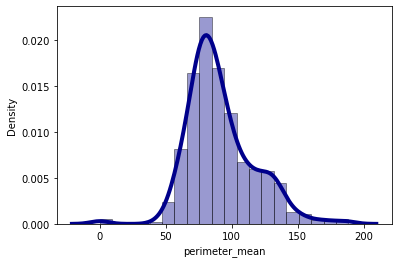

In [59]:
import seaborn as sns

data_extracted = data["perimeter_mean"]
perimeter_mean = sns.distplot(data_extracted, hist=True, kde=True, 
                bins=20, color = 'darkblue', 
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4})

/home/rakati/envs/python_finance/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


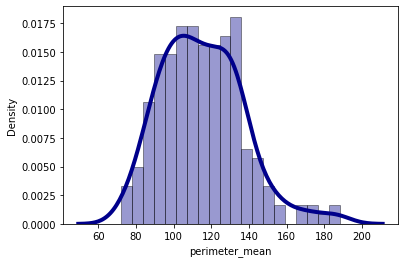

In [60]:
import seaborn as sns

data_extracted = data[(data.diagnosis == "M")]["perimeter_mean"]
perimeter_mean = sns.distplot(data_extracted, hist=True, kde=True, 
                bins=20, color = 'darkblue', 
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4})

/home/rakati/envs/python_finance/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


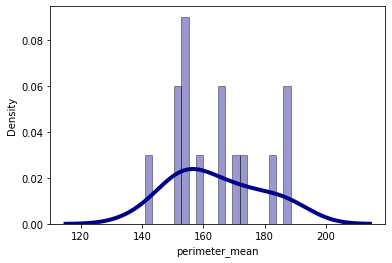

In [61]:
import seaborn as sns

data_extracted = data[(data.diagnosis == "M") & (data.area_mean > 1500)]["perimeter_mean"]
perimeter_mean = sns.distplot(data_extracted, hist=True, kde=True, 
                bins=20, color = 'darkblue', 
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4})

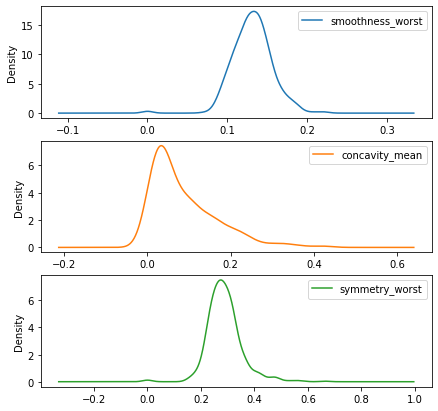

In [62]:
data_extracted = data[["smoothness_worst", "concavity_mean", "symmetry_worst"]]
row, col = data_extracted.shape

Density = data_extracted.plot(kind='density', subplots=True, layout=(col,1), sharex=False, figsize=(7,7))

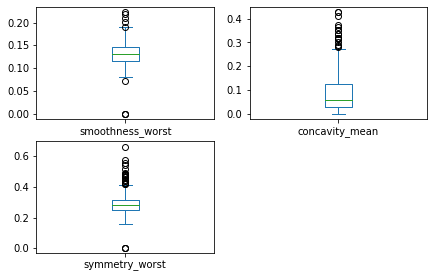

In [63]:
Box = data_extracted.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(7,7) )